# Offline Section: Quiz 3 - Problem 1

## Linear Programming Model Formulation

The problem resembles a **transshipment problem** the most. In a transshipment problem, commodities can be transported directly from sources to destinations, and can also be shipped indirectly via one or more transshipment points where the commodity can change its mode of transportation. In this case, the beer can be shipped directly from factories to retail points or indirectly through warehouses.

***Let us denote:***

$N$ as the set of nodes in the network (Factories $F1, F2$, Warehouses $W1, W2$, and Retail points $R1, R2, R3, R4$)

$A$ as the set of arcs in the network (pairs of nodes $(i, j)$ where goods can be shipped directly from node $i$ to node $j$)

$c_{ij}$ as the unit cost of shipping goods from node $i$ to node $j$, for $(i, j) \in A$

$s_i$ as the supply or demand at node $i \in N$. Negative for supply nodes (indicating goods are leaving), positive for demand nodes (indicating goods are arriving), and zero for transshipment nodes

$L_{ij}$ as the lower bound for flow from node $i$ to node $j$, for $(i, j) \in A$. In our problem, $L_{ij}$ = 0 for all arcs

$U_{ij}$ as the upper bound for flow from node $i$ to node $j$, for $(i, j) \in A$. Given for certain arcs and assumed to be infinite for the rest

$x_{ij}$ as the decision variable representing the quantity of goods to be shipped from node $i$ to node $j$, for $(i, j) \in A$

**Objective Function:**

Minimize the total cost of shipping:

$$\min \sum_{(i, j) \in A} c_{ij} \cdot x_{ij}$$

**Constraints:**

1. `Flow Conservation Constraint:` For each node $i \in N$, the inflow of goods to a node should at least be the outflow of goods from the node plus its supply/demand:

$$\sum_{j:(i,j) \in A} x_{ij} - \sum_{j:(j,i) \in A} x_{ji} \ge s_i, \quad \forall i \in N $$

2. `Upper and Lower Bounds:` The flow on each arc should respect the lower and upper bounds:

$$L_{ij} \le x_{ij} \le U_{ij}, \quad \forall (i,j) \in A $$

Here $L_{ij} = 0$ (which is the **Non-Negativity Constraint**) for all $(i, j) \in A$, and $U_{ij}$ is given for certain arcs and is assumed to be infinite for the rest.

In this problem, we aim to meet the demand at retail points at minimal cost while respecting the constraints of the network.

## Python Implementation

In [1]:
#Getting the needed data
import csv
f = open("quiz 3 problem 1.csv")
csvfile = csv.DictReader(f, delimiter=',')
headers = csvfile.fieldnames

table = []
for row in csvfile:
    table.append(row)
    
f.close()

# Create set of nodes
Nodes = set()
# start by adding the elements in the header (except for first and last element)
for i in range(1,len(headers)-1):
    Nodes.add(headers[i])

# Create dictionaries "Cost" and "Supply" (for the retail nodes)
# We can borrow the keys from "Cost" to define the arc set of the network.
Cost = {}
Capacity = {}
Supply = {}

for row in table:
    val = row['from']
    if val != 'Demand':
        for i in Nodes:
            if (row[i] != '-'):
                Cost[val,i] = float(row[i])
    else:
        for i in Nodes:
            if (row[i] != '-'):
                Supply[i] = float(row[i])

# Add the "Supply" data for the factories and complete the node set.
for row in table:
    val = row['from']
    if val != 'Demand':
        if row['Capacity'] != '-':
            Supply[val] = -float(row['Capacity'])
        Nodes.add(val)

# Complete the "Supply" data for the nodes without a supply (i.e., the 
# warehouses have 0 demand/supply).
for i in Nodes:
    if not(i in Supply.keys()):
        Supply[i] = 0
    
# Define the arc set
Arcs = Cost.keys()

Capacity = {'F1': 3200.0, 'F2': 2500.0} #This is capture in Supply but just for documentation purposes

In [2]:
Nodes

{'F1', 'F2', 'R1', 'R2', 'R3', 'R4', 'W1', 'W2'}

In [3]:
Cost

{('F1', 'R1'): 0.8,
 ('F1', 'W2'): 0.64,
 ('F1', 'W1'): 0.5,
 ('F2', 'R4'): 1.17,
 ('F2', 'W2'): 0.55,
 ('F2', 'W1'): 0.4,
 ('W1', 'R3'): 0.49,
 ('W1', 'R2'): 0.45,
 ('W1', 'R1'): 0.23,
 ('W2', 'R3'): 0.25,
 ('W2', 'R2'): 0.85,
 ('W2', 'R4'): 0.64}

In [4]:
Capacity

{'F1': 3200.0, 'F2': 2500.0}

In [5]:
Supply

{'R3': 1100.0,
 'R2': 1800.0,
 'R4': 900.0,
 'R1': 700.0,
 'F1': -3200.0,
 'F2': -2500.0,
 'W2': 0,
 'W1': 0}

In [6]:
UpperBound = {('F1', 'W1'): 100000,
              ('F1', 'W2'): 100000,
              ('F1', 'R1'): 400,
              ('F2', 'R4'): 350,
              ('F2', 'W1'): 100000,
              ('F2', 'W2'): 100000,
              ('W1', 'R3'): 100000,
              ('W1', 'R2'): 100000,
              ('W1', 'R1'): 100000,
              ('W2', 'R4'): 100000,
              ('W2', 'R3'): 100000,
              ('W2', 'R2'): 100000}

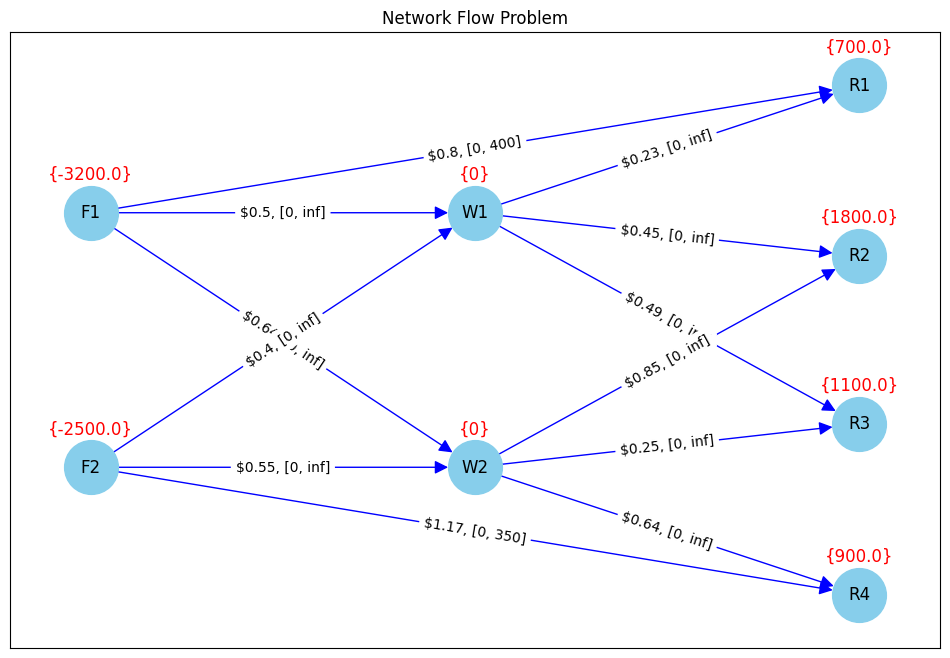

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

#Define the nodes and their supply (negative for supply, positive for demand)
nodes = ['F1', 'F2', 'W1', 'W2', 'R1', 'R2', 'R3', 'R4']
supply_demand = Supply

#Define the arcs (i, j), their costs and capacities
arcs_costs = Cost
arcs_capacity = {('F1', 'R1'): 400, ('F2', 'R4'): 350}  # Maximum capacity

#Create the graph and add nodes and arcs
G = nx.DiGraph()
G.add_nodes_from(nodes)
for arc, cost in arcs_costs.items():
    G.add_edge(arc[0], arc[1], cost=cost, capacity=arcs_capacity.get(arc, float('inf')))

#Position nodes in layers
pos = {'F1': (0, 0.5), 'F2': (0, -0.5), 'W1': (1, 0.5), 'W2': (1, -0.5), 'R1': (2, 1.0), 'R2': (2, 0.33), 'R3': (2, -0.33), 'R4': (2, -1.0)}

#Draw the network
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1500)
nx.draw_networkx_edges(G, pos, edge_color='b', arrowstyle='-|>', arrowsize=20, node_size=1500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"${arcs_costs[k]}, [{0}, {v}]"
                                                  for k, v in nx.get_edge_attributes(G, 'capacity').items()})

#Add supply/demand labels
supply_demand_labels = {node: {(supply_demand[node])} for node in nodes}
nx.draw_networkx_labels(G, {k: (v[0], v[1]+0.15) for k, v in pos.items()}, labels=supply_demand_labels, font_color='red')

plt.title('Network Flow Problem')
plt.show()

In [8]:
#Import libraries
from docplex.mp.model import Model

#Model
mdl = Model()

In [9]:
#Setting variables
shipped = mdl.continuous_var_dict(Arcs, lb=0, ub = UpperBound, name='shipped')

In [10]:
#Objective
mdl.minimize(mdl.sum(Cost[i,j]*shipped[i,j] for (i,j) in Arcs))

In [11]:
#Flow conservation constraints
for i in Nodes:
    inflow = mdl.sum(shipped[j,i] for j in Nodes if (j,i) in Arcs)
    outflow = mdl.sum(shipped[i,j] for j in Nodes if (i,j) in Arcs)
    mdl.add_constraint(inflow - outflow >= Supply[i]) #Critical piece as there is more supply than demand

In [12]:
# #Add upper bounds for some arcs (alternative to using the upper bound)
# mdl.add_constraint(shipped["F1", "R1"] <= 400)
# mdl.add_constraint(shipped["F2", "R4"] <= 350)    

In [13]:
#Solve
solution = mdl.solve()
mdl.get_solve_details()

docplex.mp.SolveDetails(time=0,status='optimal')

In [14]:
#Print solution
for i, j in Arcs:
    if shipped[i, j].solution_value > 0:
        print(f"Amount of beer shipped from {i} to {j} is: {shipped[i, j].solution_value}")

#Print objective value (i.e., total cost)
print(f"\nThe total cost is: {mdl.objective_value}")

Amount of beer shipped from F1 to W2 is: 1650.0
Amount of beer shipped from F1 to W1 is: 350.0
Amount of beer shipped from F2 to R4 is: 350.0
Amount of beer shipped from F2 to W1 is: 2150.0
Amount of beer shipped from W1 to R2 is: 1800.0
Amount of beer shipped from W1 to R1 is: 700.0
Amount of beer shipped from W2 to R3 is: 1100.0
Amount of beer shipped from W2 to R4 is: 550.0

The total cost is: 4098.5


## Quiz Section